In [2]:
import json
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

In [3]:
runLocationFile = open("runlocation.txt")
runLocation = runLocationFile.readline()

df = pd.DataFrame()
for root, dirs, files in os.walk(runLocation):
    for name in files:
        if name.endswith(".run"):
            f = open(root + '/' + name)
            temp_run = f.readline()
            f.close()
            temp_dict = json.loads(temp_run)
            temp_dataFrame = pd.DataFrame([temp_dict])
            df = pd.concat([df, temp_dataFrame], ignore_index= True)

In [4]:
df.head()

,gold_per_floor,floor_reached,playtime,items_purged,score,play_id,local_time,is_ascension_mode,campfire_choices,neow_cost,...,event_choices,is_beta,boss_relics,items_purged_floors,is_endless,potions_floor_spawned,killed_by,ascension_level,special_seed,daily_mods
0,"[113, 130, 12, 12, 26, 26, 53, 53, 53, 69, 92,...",16,451,[Clash],216,f54f60e6-8ba3-4c7a-9e52-0ad9a61fe447,20220718170453,True,"[{'data': 'Inflame', 'floor': 6, 'key': 'SMITH...",TEN_PERCENT_HP_LOSS,...,"[{'damage_healed': 0, 'gold_gain': 0, 'player_...",False,[],[3],False,"[1, 10, 11]",Hexaghost,20,NaN,NaN
1,"[119, 138, 155, 155, 155, 188, 188, 199, 224, ...",51,2629,[Fire Breathing],1667,27f8c62f-e147-49a3-bf6b-eccc3bbaf7b3,20240501191739,True,"[{'floor': 7.0, 'key': 'REST'}, {'floor': 15.0...",NONE,...,"[{'damage_healed': 0.0, 'max_hp_gain': 0.0, 'm...",False,"[{'not_picked': ['Runic Dome', 'Philosopher's ...",[36],False,"[1, 2, 8, 14, 16, 21, 24, 27, 30, 31, 33, 35, ...",Donu and Deca,20,0.0,NaN
2,"[20, 70, 84, 95, 112, 112, 125, 125, 172, 207,...",23,755,[Strike_R],410,71eca2be-bde1-4a59-b699-b2256511217d,20220423073516,True,"[{'data': 'Uppercut', 'floor': 6, 'key': 'SMIT...",NO_GOLD,...,"[{'damage_healed': 0, 'gold_gain': 50, 'player...",False,"[{'not_picked': ['Empty Cage', 'Sozu'], 'picke...",[20],False,"[3, 4, 16, 21]",Book of Stabbing,20,NaN,NaN
3,"[369, 18, 28, 28, 43, 76, 76, 101, 101, 101, 1...",40,1499,"[Strike_R, Normality]",956,a4b5a97b-d652-4bbc-bba5-d491ca379521,20220724223004,True,"[{'data': 'Bash', 'floor': 7.0, 'key': 'SMITH'...",TEN_PERCENT_HP_LOSS,...,"[{'damage_healed': 0.0, 'max_hp_gain': 0.0, 'm...",False,"[{'not_picked': ['Runic Pyramid', 'Mark of Pai...","[19, 38]",False,"[5, 6, 8, 11, 14, 18, 22, 23, 28, 30, 31, 37]",Giant Head,20,0.0,NaN
4,"[216, 228, 10, 30, 50, 50, 82, 99, 99, 125, 14...",16,627,[],252,7e3796ad-0f20-4779-899e-d940d5d1e229,20240417143139,True,"[{'data': 'Perfected Strike', 'floor': 6.0, 'k...",NONE,...,[],False,[],[],False,"[4, 5, 7, 12]",The Guardian,20,0.0,NaN


In [5]:
# Filter for ascension 20 
asc_20_mask = df['ascension_level'] == 20
asc_20_mask
df = df[asc_20_mask]

In [6]:
gold_per_floor_winning = []
ironclad_gold_per_floor_winning = []
silent_gold_per_floor_winning = []
defect_gold_per_floor_winning = []
watcher_gold_per_floor_winning = []

In [7]:
for i in range(df.shape[0]): 
    floor_reached_index = df.columns.get_loc('floor_reached')
    if df.iloc[i, floor_reached_index] == 57: 
        gold_per_floor_col_index = df.columns.get_loc('gold_per_floor')
        tmp_list = df.iloc[i,gold_per_floor_col_index]
        gold_per_floor_winning.append(tmp_list)
        char_chosen_col_index = df.columns.get_loc('character_chosen')
        char_chosen = df.iloc[i, char_chosen_col_index]
        if char_chosen == 'IRONCLAD':
            ironclad_gold_per_floor_winning.append(tmp_list)
        elif char_chosen == 'THE_SILENT': 
            silent_gold_per_floor_winning.append(tmp_list)
        elif char_chosen == 'DEFECT':
            defect_gold_per_floor_winning.append(tmp_list)
        else : 
            watcher_gold_per_floor_winning.append(tmp_list)

In [8]:
# The * operator 'unpacks' a list, that is to say that it passes all elements of the iterable into the function
# in this case all sub-lists, from list_of_lists, are passed as arguments in the zip function
# This results in a zip object where every ith element of the zip object contains the ith element of 
# each of the sub-list 
def average_gold_per_floor(list_of_lists): 
    average = [sum(sub_list) / len(sub_list) for sub_list in zip(*list_of_lists)]
    return average

def max_gold_per_floor(list_of_lists): 
    max_list = [max(sub_list) for sub_list in zip(*list_of_lists)]
    return max_list

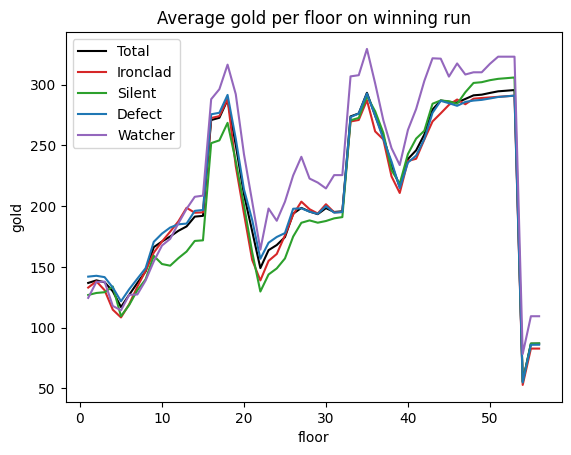

In [9]:
total_average_gold_per_floor_winning = average_gold_per_floor(gold_per_floor_winning)
average_ironclad_gold_per_floor_winning = average_gold_per_floor(ironclad_gold_per_floor_winning)
average_silent_gold_per_floor_winning = average_gold_per_floor(silent_gold_per_floor_winning)
average_defect_gold_per_floor_winning = average_gold_per_floor(defect_gold_per_floor_winning)
average_watcher_gold_per_floor_winning = average_gold_per_floor(watcher_gold_per_floor_winning)


floor_list_index = [i for i in range(1,57)]
plt.plot(floor_list_index, total_average_gold_per_floor_winning, 'k', label = 'Total')
plt.plot(floor_list_index, average_ironclad_gold_per_floor_winning, 'tab:red', label = 'Ironclad')
plt.plot(floor_list_index, average_silent_gold_per_floor_winning, 'tab:green', label = 'Silent')
plt.plot(floor_list_index, average_defect_gold_per_floor_winning, 'tab:blue', label = 'Defect')
plt.plot(floor_list_index, average_watcher_gold_per_floor_winning, 'tab:purple', label = 'Watcher')
plt.legend()
plt.ylabel('gold')
plt.xlabel('floor')
plt.title('Average gold per floor on winning run')
plt.show()

# add legend, axes labels, title later

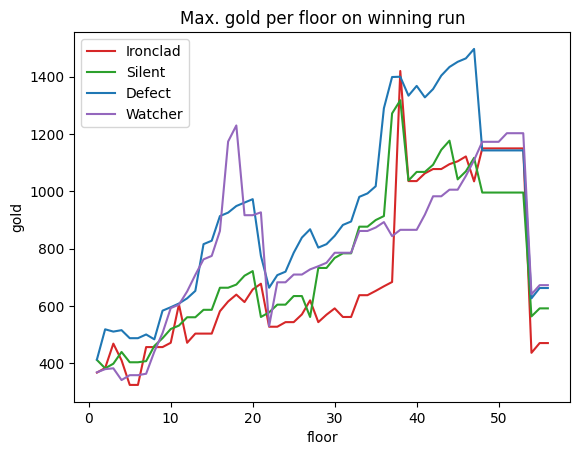

In [10]:
max_ironclad_gold_per_floor_winning = max_gold_per_floor(ironclad_gold_per_floor_winning)
max_silent_gold_per_floor_winning = max_gold_per_floor(silent_gold_per_floor_winning)
max_defect_gold_per_floor_winning = max_gold_per_floor(defect_gold_per_floor_winning)
max_watcher_gold_per_floor_winning = max_gold_per_floor(watcher_gold_per_floor_winning)

plt.plot(floor_list_index, max_ironclad_gold_per_floor_winning, 'tab:red', label = 'Ironclad')
plt.plot(floor_list_index, max_silent_gold_per_floor_winning, 'tab:green', label = 'Silent')
plt.plot(floor_list_index, max_defect_gold_per_floor_winning, 'tab:blue', label = 'Defect')
plt.plot(floor_list_index, max_watcher_gold_per_floor_winning, 'tab:purple', label = 'Watcher')
plt.legend()
plt.ylabel('gold')
plt.xlabel('floor')
plt.title('Max. gold per floor on winning run')
plt.show()
# add legend, axes labels, title later
# The graph shouldn't be a line, scatter plot??? or the graphs with points joined by lines. 
# Don't know what they are called

In [11]:
# make all the lists in the gold_per_floor column of length 56, 
# the max no. of floors. Enable calculation of average gold per floor
def to_max_floor_length(df): 
    max_floor = 56
    to_max_floor = lambda x: x + [0 for i in range(max_floor - len(x))]
    df['gold_per_floor'] = df['gold_per_floor'].apply(to_max_floor)

to_max_floor_length(df)

In [12]:
total_gold_per_floor = []
ironclad_gold_per_floor = []
silent_gold_per_floor = []
defect_gold_per_floor = []
watcher_gold_per_floor = []

In [13]:
# get average gold per floor for all runs
for i in range(df.shape[0]): 
    gold_per_floor_col_index = df.columns.get_loc('gold_per_floor')
    tmp_list = df.iloc[i,gold_per_floor_col_index]
    total_gold_per_floor.append(tmp_list)
    char_chosen_col_index = df.columns.get_loc('character_chosen')
    char_chosen = df.iloc[i, char_chosen_col_index]
    if char_chosen == 'IRONCLAD':
        ironclad_gold_per_floor.append(tmp_list)
    elif char_chosen == 'THE_SILENT': 
        silent_gold_per_floor.append(tmp_list)
    elif char_chosen == 'DEFECT':
        defect_gold_per_floor.append(tmp_list)
    else : 
        watcher_gold_per_floor.append(tmp_list)

In [14]:
total_average_gold_per_floor = average_gold_per_floor(total_gold_per_floor)
average_ironclad_gold_per_floor = average_gold_per_floor(ironclad_gold_per_floor)
average_silent_gold_per_floor = average_gold_per_floor(silent_gold_per_floor)
average_defect_gold_per_floor = average_gold_per_floor(defect_gold_per_floor)
average_watcher_gold_per_floor = average_gold_per_floor(watcher_gold_per_floor)

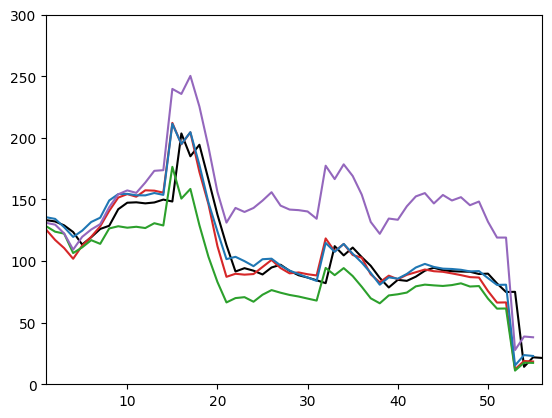

In [15]:
plt.plot(floor_list_index, total_average_gold_per_floor, 'k'
        , average_ironclad_gold_per_floor, 'tab:red'
        , average_silent_gold_per_floor, 'tab:green'
        , average_defect_gold_per_floor, 'tab:blue'
        , average_watcher_gold_per_floor, 'tab:purple')
plt.axis([1,56,0,300])
plt.show()
# add legend, axes labels, title later

In [16]:
neow_bonus_df = df[['neow_cost', 'neow_bonus', 'floor_reached']].copy()
neow_bonus_freq = neow_bonus_df.groupby(['neow_cost', 'neow_bonus'], as_index = False).count()
neow_bonus_freq.rename(columns = {'floor_reached': 'frequency'}, inplace = True)
neow_bonus_freq.head()

,neow_cost,neow_bonus,frequency
0,,,7
1,CURSE,ONE_RARE_RELIC,21
2,CURSE,RANDOM_COLORLESS_2,25
3,CURSE,THREE_RARE_CARDS,26
4,CURSE,TRANSFORM_TWO_CARDS,45


In [17]:
killed_heart = neow_bonus_df['floor_reached'] == 57
neow_bonus_killed_heart_df = neow_bonus_df[killed_heart]
neow_bonus_killed_heart_freq = neow_bonus_killed_heart_df.groupby(['neow_cost', 'neow_bonus'],
                               as_index=False).count()
neow_bonus_killed_heart_freq.rename(columns = {'floor_reached': 'win_frequency'}, inplace = True)
neow_bonus_killed_heart_freq.head()

,neow_cost,neow_bonus,win_frequency
0,CURSE,ONE_RARE_RELIC,5
1,CURSE,RANDOM_COLORLESS_2,6
2,CURSE,THREE_RARE_CARDS,3
3,CURSE,TRANSFORM_TWO_CARDS,4
4,CURSE,TWO_FIFTY_GOLD,38


In [18]:
## NEOW BONUS AND COST WIN RATES
neow_bonus_winrate = pd.merge(neow_bonus_freq, neow_bonus_killed_heart_freq, how = 'left')
neow_bonus_winrate['win_rate'] = neow_bonus_winrate['win_frequency']/neow_bonus_winrate['frequency'] * 100
neow_bonus_winrate.sort_values(by ='win_rate', ascending = False)

,neow_cost,neow_bonus,frequency,win_frequency,win_rate
26,PERCENT_DAMAGE,REMOVE_TWO,11,5.0,45.454545
11,NONE,REMOVE_CARD,104,36.0,34.615385
23,NO_GOLD,TWENTY_PERCENT_HP_BONUS,7,2.0,28.571429
5,CURSE,TWO_FIFTY_GOLD,142,38.0,26.760563
18,NO_GOLD,ONE_RARE_RELIC,121,31.0,25.619835
32,TEN_PERCENT_HP_LOSS,REMOVE_TWO,90,23.0,25.555556
33,TEN_PERCENT_HP_LOSS,THREE_RARE_CARDS,120,30.0,25.000000
30,TEN_PERCENT_HP_LOSS,ONE_RARE_RELIC,128,31.0,24.218750
17,NONE,UPGRADE_CARD,253,61.0,24.110672
2,CURSE,RANDOM_COLORLESS_2,25,6.0,24.000000


In [19]:
## INSTANT LEAVE NEOW BONUSES
zero_floors = neow_bonus_df['floor_reached'] == 0
zero_floors_df = neow_bonus_df[zero_floors]
zero_floors_df = zero_floors_df.groupby(['neow_cost', 'neow_bonus'], as_index = False).count()
zero_floors_df = zero_floors_df.rename(columns= {'floor_reached' : 'frequency'})
zero_floors_df.sort_values(by = 'frequency', ascending = False)

,neow_cost,neow_bonus,frequency
3,NONE,BOSS_RELIC,23
10,NO_GOLD,RANDOM_COLORLESS_2,21
16,TEN_PERCENT_HP_LOSS,RANDOM_COLORLESS_2,17
14,PERCENT_DAMAGE,RANDOM_COLORLESS_2,10
0,,,7
15,PERCENT_DAMAGE,THREE_RARE_CARDS,4
1,CURSE,RANDOM_COLORLESS_2,4
5,NONE,ONE_RANDOM_RARE_CARD,3
12,NO_GOLD,TRANSFORM_TWO_CARDS,2
4,NONE,HUNDRED_GOLD,2


In [20]:
## WIN RATES BY NEOW BONUS
neow_bonus_total = neow_bonus_df.groupby(['neow_bonus'], as_index = False).count()
neow_bonus_total.drop(['floor_reached'], axis = 1, inplace = True)
neow_bonus_total.rename(columns = {'neow_cost' : 'frequency'}, inplace = True)
neow_bonus_killed_heart = neow_bonus_killed_heart_df.groupby(['neow_bonus'], as_index = False).count()
neow_bonus_killed_heart.drop(['floor_reached'], axis = 1, inplace = True)
neow_bonus_killed_heart.rename(columns = {'neow_cost' : 'win_frequency'}, inplace = True)
neow_bonus_merge = pd.merge(neow_bonus_total, neow_bonus_killed_heart, how = 'left')
neow_bonus_merge['win_rate'] = neow_bonus_merge['win_frequency']/ neow_bonus_merge['frequency'] * 100
neow_bonus_merge.sort_values(by = 'win_rate', ascending = False)

,neow_bonus,frequency,win_frequency,win_rate
8,REMOVE_CARD,104,36.0,34.615385
17,TWENTY_PERCENT_HP_BONUS,7,2.0,28.571429
4,ONE_RARE_RELIC,288,71.0,24.652778
18,TWO_FIFTY_GOLD,423,102.0,24.113475
19,UPGRADE_CARD,253,61.0,24.110672
15,TRANSFORM_CARD,115,27.0,23.478261
7,RANDOM_COMMON_RELIC,265,62.0,23.396226
5,RANDOM_COLORLESS,133,31.0,23.308271
9,REMOVE_TWO,185,43.0,23.243243
2,HUNDRED_GOLD,453,100.0,22.075055


In [21]:
## WIN RATES BY NEOW COST
neow_cost_total = neow_bonus_df.groupby(['neow_cost'], as_index = False).count()
neow_cost_total.drop(['floor_reached'], axis = 1, inplace = True)
neow_cost_total.rename(columns = {'neow_bonus' : 'frequency'}, inplace = True)
neow_cost_killed_heart = neow_bonus_killed_heart_df.groupby(['neow_cost'], as_index = False).count()
neow_cost_killed_heart.drop(['floor_reached'], axis = 1, inplace = True)
neow_cost_killed_heart.rename(columns = {'neow_bonus' : 'win_frequency'}, inplace = True)
neow_cost_merge = pd.merge(neow_cost_total, neow_cost_killed_heart, how = 'left')
neow_cost_merge['win_rate'] = neow_cost_merge['win_frequency']/ neow_cost_merge['frequency'] * 100
neow_cost_merge.sort_values(by = 'win_rate', ascending = False)

,neow_cost,frequency,win_frequency,win_rate
4,PERCENT_DAMAGE,221,51.0,23.076923
5,TEN_PERCENT_HP_LOSS,734,164.0,22.343324
3,NO_GOLD,586,128.0,21.843003
1,CURSE,259,56.0,21.621622
2,NONE,3196,672.0,21.026283
0,,7,NaN,NaN


In [22]:
def count_frequency(some_dict, some_list): 
    for item in some_list: 
        if(item in some_dict): 
            some_dict[item] += 1
        else: 
            some_dict[item] = 1

In [23]:
relics_df = df[['relics', 'floor_reached', 'character_chosen']].copy()
heart_kills = relics_df['floor_reached'] == 57
relics_heart_kills_df = relics_df[heart_kills]
relics_heart_kills_df
win_relics_freq = {}
for i in range(relics_heart_kills_df.shape[0]): 
    count_frequency(win_relics_freq, relics_heart_kills_df.iloc[i,0])
total_relic_freq = {} 
for i in range(relics_df.shape[0]): 
    count_frequency(total_relic_freq, relics_df.iloc[i,0])
total_relics_df = pd.DataFrame.from_dict(total_relic_freq, orient = 'index', columns = ['frequency'])
winning_relics_df = pd.DataFrame.from_dict(win_relics_freq, orient = 'index', columns = ['win_frequency'])
relics_merge_df = pd.merge(total_relics_df, winning_relics_df, left_index = True, right_index = True, how = 'left')
relics_merge_df['win_rate'] = relics_merge_df['win_frequency']/relics_merge_df['frequency'] * 100
relics_merge_df.sort_values(by = 'win_rate', ascending = False, inplace = True)
relics_merge_df

,frequency,win_frequency,win_rate
GremlinMask,1,1,100.000000
Strange Spoon,7,7,100.000000
Cauldron,5,4,80.000000
TwistedFunnel,10,8,80.000000
HolyWater,5,4,80.000000
...,...,...,...
NeowsBlessing,831,165,19.855596
Ring of the Snake,1249,218,17.453963
Ectoplasm,93,16,17.204301
Golden Idol,627,92,14.673046


In [24]:
# Inserts a space between a lower case letter and an upper case letter in a given string
def space_between_words(some_str, index): 
    for i in range(len(some_str) - 1):
        if some_str[i].islower() and some_str[i+1].isupper(): 
            new_string = some_str[0:i+1] + ' ' + some_str[i+1:]
            return space_between_words(new_string, i + 2)
    return some_str

In [25]:
relic_list = relics_merge_df.index.tolist()
relic_list_corrections = {'Toxic Egg 2' : 'Toxic Egg', 
                          'Yang' : 'Duality'}
for idx, item in enumerate(relic_list): 
    relic_list[idx] = space_between_words(relic_list[idx],0)
relic_list

['Gremlin Mask',
 'Strange Spoon',
 'Cauldron',
 'Twisted Funnel',
 'Holy Water',
 'Spirit Poop',
 'Teardrop Locket',
 'Frozen Eye',
 'Tough Bandages',
 'Pocketwatch',
 'Orange Pellets',
 'Dollys Mirror',
 'Dead Branch',
 'Paper Crane',
 "Nilry's Codex",
 'Yang',
 'Incense Burner',
 'Gambling Chip',
 'The Abacus',
 'Captains Wheel',
 'Bottled Tornado',
 'Bird Faced Urn',
 'Bottled Lightning',
 'Snecko Eye',
 'Data Disk',
 'Runic Capacitor',
 'Fossilized Helix',
 'Mummified Hand',
 'Lizard Tail',
 'Sling',
 'Ring of the Serpent',
 'Ssserpent Head',
 'Calipers',
 'Old Coin',
 'Ink Bottle',
 'Bag of Preparation',
 'Toxic Egg 2',
 'Clockwork Souvenir',
 'Paper Frog',
 'Inserter',
 'Horn Cleat',
 'Emotion Chip',
 'Thread and Needle',
 'Medical Kit',
 'Ice Cream',
 'Mercury Hourglass',
 'Mango',
 'Membership Card',
 'Cables',
 'Runic Pyramid',
 'Centennial Puzzle',
 'Pantograph',
 'Tungsten Rod',
 'Pear',
 'Damaru',
 'Prayer Wheel',
 'Shuriken',
 'Anchor',
 "Pandora's Box",
 'Oddly Smooth St

In [26]:
relic_freq_more_than_5 = relics_merge_df['frequency'] > 5
relics_win_more_than_5_df = relics_merge_df[relic_freq_more_than_5]
relics_win_more_than_5_df.sort_values(by = 'win_rate', ascending = False).head(20)

,frequency,win_frequency,win_rate
Strange Spoon,7,7,100.000000
TwistedFunnel,10,8,80.000000
Spirit Poop,8,6,75.000000
TeardropLocket,16,10,62.500000
Frozen Eye,100,60,60.000000
Tough Bandages,49,28,57.142857
Pocketwatch,233,133,57.081545
OrangePellets,486,265,54.526749
DollysMirror,316,172,54.430380
Dead Branch,204,111,54.411765


In [27]:
def relic_winrate_by_char(some_char): 
    # Obtain a boolean series based on whether heart was killed
    heart_kills = relics_df['floor_reached'] == 57
    # Obtain a boolean series based on character played
    if some_char == 'IRONCLAD': 
        char_runs = relics_df['character_chosen'] == 'IRONCLAD'
    elif some_char == 'THE_SILENT': 
        char_runs = relics_df['character_chosen'] == 'THE_SILENT'
    elif some_char == 'DEFECT': 
        char_runs = relics_df['character_chosen'] == 'DEFECT'
    else: 
        char_runs = relics_df['character_chosen'] == 'WATCHER'
    # Obtain a boolean series based on character played AND heart being killed
    heart_kills_by_char = heart_kills & char_runs
    # Obtain relic frequency in wins by character
    heart_kills_df = relics_df[heart_kills_by_char]
    char_win_relics_freq = {}
    for i in range(heart_kills_df.shape[0]): 
        count_frequency(char_win_relics_freq, heart_kills_df.iloc[i,0])
    # Obtain relics frequency in all runs by character 
    runs_by_char_df = relics_df[char_runs]
    char_total_relics_freq = {}
    for i in range(runs_by_char_df.shape[0]):
        count_frequency(char_total_relics_freq, runs_by_char_df.iloc[i,0])
    
    total_relics_df = pd.DataFrame.from_dict(char_total_relics_freq, orient = 'index', columns = ['frequency'])
    winning_relics_df = pd.DataFrame.from_dict(char_win_relics_freq, orient = 'index', columns = ['win_frequency'])
    relics_merge_df = pd.merge(total_relics_df, winning_relics_df, left_index = True, right_index = True, how = 'left')
    relics_merge_df['win_rate'] = relics_merge_df['win_frequency']/relics_merge_df['frequency'] * 100
    result = relics_merge_df.sort_values(by = 'win_rate', ascending = False)
    return result

In [48]:
ironclad_relics = relic_winrate_by_char('IRONCLAD')
ironclad_relics.head(20)

,frequency,win_frequency,win_rate
Nloth's Gift,4,4.0,100.000000
Strange Spoon,4,4.0,100.000000
Dead Branch,38,27.0,71.052632
SsserpentHead,3,2.0,66.666667
Frozen Eye,13,8.0,61.538462
Nilry's Codex,14,8.0,57.142857
Ginger,35,19.0,54.285714
Prayer Wheel,32,17.0,53.125000
Ice Cream,34,18.0,52.941176
Toolbox,61,32.0,52.459016


In [29]:
ironclad_relics.tail(20)

,frequency,win_frequency,win_rate
Champion Belt,36,10.0,27.777778
Runic Cube,23,6.0,26.086957
WingedGreaves,31,8.0,25.806452
Ectoplasm,28,7.0,25.000000
Dream Catcher,68,17.0,25.000000
Chemical X,12,3.0,25.000000
Bottled Flame,20,5.0,25.000000
Bloody Idol,8,2.0,25.000000
NeowsBlessing,115,27.0,23.478261
Empty Cage,26,6.0,23.076923


In [30]:
silent_relics = relic_winrate_by_char('THE_SILENT')
silent_relics.head(20)

,frequency,win_frequency,win_rate
Strange Spoon,3,3.0,100.000000
Spirit Poop,1,1.0,100.000000
TwistedFunnel,10,8.0,80.000000
Busted Crown,13,9.0,69.230769
TheAbacus,58,34.0,58.620690
DollysMirror,60,35.0,58.333333
Frozen Eye,19,11.0,57.894737
Nilry's Codex,14,8.0,57.142857
Tough Bandages,49,28.0,57.142857
Necronomicon,11,6.0,54.545455


In [31]:
silent_relics.tail(20)

,frequency,win_frequency,win_rate
MealTicket,108,30.0,27.777778
Velvet Choker,11,3.0,27.272727
Matryoshka,70,19.0,27.142857
Astrolabe,89,24.0,26.966292
Molten Egg 2,75,20.0,26.666667
Odd Mushroom,61,14.0,22.950820
Snecko Eye,15,3.0,20.000000
Shovel,37,7.0,18.918919
NeowsBlessing,307,57.0,18.566775
Calling Bell,45,8.0,17.777778


In [32]:
defect_relics = relic_winrate_by_char('DEFECT')
defect_relics.head(20)

,frequency,win_frequency,win_rate
Sling,1,1,100.000000
GremlinMask,1,1,100.000000
Cauldron,5,4,80.000000
Spirit Poop,7,5,71.428571
Pocketwatch,148,90,60.810811
Bird Faced Urn,131,79,60.305344
Frozen Eye,68,41,60.294118
MutagenicStrength,5,3,60.000000
Bottled Lightning,176,102,57.954545
Bottled Tornado,147,84,57.142857


In [33]:
defect_relics.tail(20)

,frequency,win_frequency,win_rate
Philosopher's Stone,131,45,34.351145
PrismaticShard,3,1,33.333333
Molten Egg 2,222,73,32.882883
Cursed Key,238,77,32.352941
Tiny House,42,13,30.952381
WarpedTongs,159,49,30.817610
Odd Mushroom,139,42,30.215827
SlaversCollar,102,29,28.431373
SacredBark,43,12,27.906977
Darkstone Periapt,162,43,26.543210


In [34]:
watcher_relics = relic_winrate_by_char('WATCHER')
watcher_relics.head(20)

,frequency,win_frequency,win_rate
Bird Faced Urn,9,9.0,100.000000
Chemical X,2,2.0,100.000000
StoneCalendar,6,6.0,100.000000
HolyWater,5,4.0,80.000000
Medical Kit,10,8.0,80.000000
Mango,5,4.0,80.000000
Calipers,14,11.0,78.571429
Ice Cream,9,7.0,77.777778
CaptainsWheel,9,7.0,77.777778
Runic Pyramid,26,20.0,76.923077


In [35]:
watcher_relics.tail(20)

,frequency,win_frequency,win_rate
Fusion Hammer,25,9.0,36.000000
PureWater,123,42.0,34.146341
DollysMirror,9,3.0,33.333333
Cursed Key,15,5.0,33.333333
Strawberry,16,5.0,31.250000
Whetstone,32,10.0,31.250000
NeowsBlessing,16,5.0,31.250000
Blue Candle,10,3.0,30.000000
Bloody Idol,7,2.0,28.571429
Calling Bell,7,2.0,28.571429


In [36]:
df.groupby(['killed_by']).size()

killed_by
2 Fungi Beasts        10
2 Louse               17
2 Orb Walkers          6
2 Thieves             31
3 Byrds               33
                    ... 
The Heart            181
The Mushroom Lair     11
Time Eater           119
Transient             31
Writhing Mass         25
Length: 63, dtype: int64

In [37]:
df.columns

Index(['gold_per_floor', 'floor_reached', 'playtime', 'items_purged', 'score',
       'play_id', 'local_time', 'is_ascension_mode', 'campfire_choices',
       'neow_cost', 'seed_source_timestamp', 'circlet_count', 'master_deck',
       'relics', 'potions_floor_usage', 'damage_taken', 'seed_played',
       'potions_obtained', 'is_trial', 'path_per_floor', 'character_chosen',
       'items_purchased', 'campfire_rested', 'item_purchase_floors',
       'current_hp_per_floor', 'gold', 'neow_bonus', 'is_prod', 'is_daily',
       'chose_seed', 'campfire_upgraded', 'win_rate', 'timestamp',
       'path_taken', 'build_version', 'purchased_purges', 'victory',
       'max_hp_per_floor', 'relic_stats', 'card_choices', 'player_experience',
       'relics_obtained', 'event_choices', 'is_beta', 'boss_relics',
       'items_purged_floors', 'is_endless', 'potions_floor_spawned',
       'killed_by', 'ascension_level', 'special_seed', 'daily_mods'],
      dtype='object')

In [38]:
df.columns
# path_per_floor was actual floor path_taken was the choices made
# ? floors could be a shop and would show up as a shop in path_per_floor and as a ? in path_taken

Index(['gold_per_floor', 'floor_reached', 'playtime', 'items_purged', 'score',
       'play_id', 'local_time', 'is_ascension_mode', 'campfire_choices',
       'neow_cost', 'seed_source_timestamp', 'circlet_count', 'master_deck',
       'relics', 'potions_floor_usage', 'damage_taken', 'seed_played',
       'potions_obtained', 'is_trial', 'path_per_floor', 'character_chosen',
       'items_purchased', 'campfire_rested', 'item_purchase_floors',
       'current_hp_per_floor', 'gold', 'neow_bonus', 'is_prod', 'is_daily',
       'chose_seed', 'campfire_upgraded', 'win_rate', 'timestamp',
       'path_taken', 'build_version', 'purchased_purges', 'victory',
       'max_hp_per_floor', 'relic_stats', 'card_choices', 'player_experience',
       'relics_obtained', 'event_choices', 'is_beta', 'boss_relics',
       'items_purged_floors', 'is_endless', 'potions_floor_spawned',
       'killed_by', 'ascension_level', 'special_seed', 'daily_mods'],
      dtype='object')

In [39]:
df.iloc[0, df.columns.get_loc('path_per_floor')]

['M',
 'M',
 '$',
 '?',
 'M',
 'R',
 'E',
 'R',
 'T',
 'M',
 '?',
 'E',
 '?',
 '$',
 'R',
 'B']

In [40]:
df.iloc[0, df.columns.get_loc('path_taken')]

['M',
 'M',
 '$',
 '?',
 'M',
 'R',
 'E',
 'R',
 'T',
 'M',
 '?',
 'E',
 '?',
 '?',
 'R',
 'BOSS']

In [41]:
heart_kills_df = df[heart_kills]
winning_decks = heart_kills_df["master_deck"]
column_names = ["master_deck"]
winning_decks = pd.DataFrame(winning_decks, columns=column_names)
winning_decks['deck_size'] = winning_decks['master_deck'].map(lambda x : len(x))
winning_decks


,master_deck,deck_size
6,"[AscendersBane, Strike_R, Defend_R, Defend_R, ...",36
11,"[AscendersBane, Bash, Clothesline, Wild Strike...",31
36,"[AscendersBane, Bash+1, Reaper, Exhume, Anger,...",30
41,"[AscendersBane, Bash, Flame Barrier+1, Shockwa...",35
44,"[AscendersBane, Defend_R, Defend_R+1, Defend_R...",35
...,...,...
5160,"[AscendersBane, Strike_G, Defend_G, Defend_G, ...",42
5175,"[AscendersBane, Survivor, Neutralize, Bandage ...",38
5176,"[AscendersBane, Strike_G, Defend_G, Defend_G, ...",38
5195,"[AscendersBane, Survivor, Neutralize, Piercing...",33


<Axes: xlabel='deck_size'>

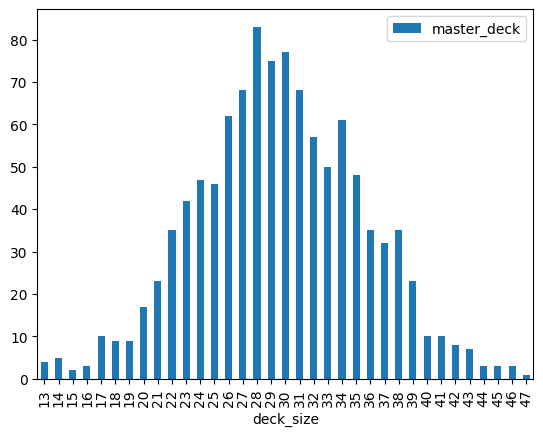

In [42]:
winning_decks.groupby = winning_decks.groupby(['deck_size']).count()
winning_decks.groupby.plot(kind = 'bar')

In [43]:
deck_df = df[['master_deck', 'floor_reached', 'character_chosen']].copy()
def deck_size_by_char(some_char): 
    # Obtain a boolean series based on whether heart was killed
    heart_kills = deck_df['floor_reached'] == 57
    # Obtain a boolean series based on character played
    if some_char == 'IRONCLAD': 
        char_runs = deck_df['character_chosen'] == 'IRONCLAD'
    elif some_char == 'THE_SILENT': 
        char_runs = deck_df['character_chosen'] == 'THE_SILENT'
    elif some_char == 'DEFECT': 
        char_runs = deck_df['character_chosen'] == 'DEFECT'
    else: 
        char_runs = deck_df['character_chosen'] == 'WATCHER'
    # Obtain a boolean series based on character played AND heart being killed
    heart_kills_by_char = heart_kills & char_runs
    # Obtain relic frequency in wins by character
    heart_kills_df = deck_df[heart_kills_by_char]
    heart_kills_df['deck_size'] = heart_kills_df['master_deck'].map(lambda x : len(x))
    heart_kills_deck_size = heart_kills_df['deck_size'].value_counts().sort_index()
    heart_kills_deck_size.plot(kind = "bar")

/var/folders/5k/9bdvmwvx17569nz_cwrw0dwc0000gn/T/ipykernel_4714/3311389314.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  heart_kills_df['deck_size'] = heart_kills_df['master_deck'].map(lambda x : len(x))


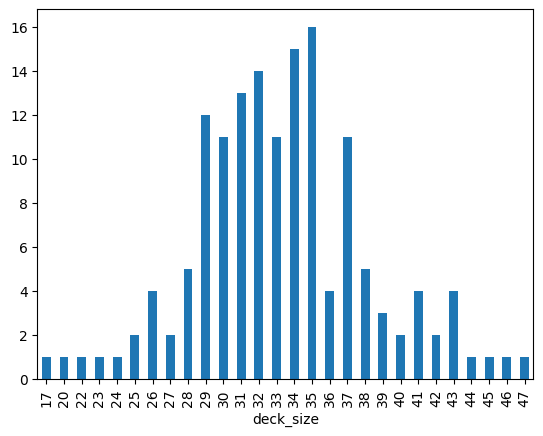

In [44]:
deck_size_by_char("IRONCLAD")

/var/folders/5k/9bdvmwvx17569nz_cwrw0dwc0000gn/T/ipykernel_4714/3311389314.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  heart_kills_df['deck_size'] = heart_kills_df['master_deck'].map(lambda x : len(x))


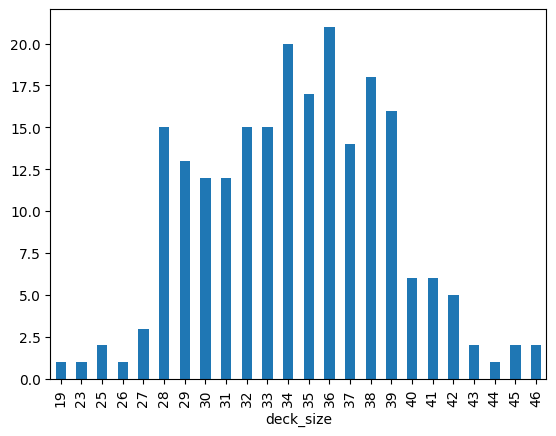

In [45]:
deck_size_by_char("THE_SILENT")

/var/folders/5k/9bdvmwvx17569nz_cwrw0dwc0000gn/T/ipykernel_4714/3311389314.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  heart_kills_df['deck_size'] = heart_kills_df['master_deck'].map(lambda x : len(x))


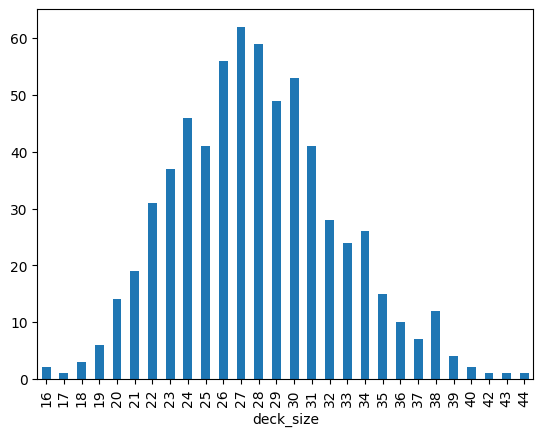

In [46]:
deck_size_by_char("DEFECT")

/var/folders/5k/9bdvmwvx17569nz_cwrw0dwc0000gn/T/ipykernel_4714/3311389314.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  heart_kills_df['deck_size'] = heart_kills_df['master_deck'].map(lambda x : len(x))


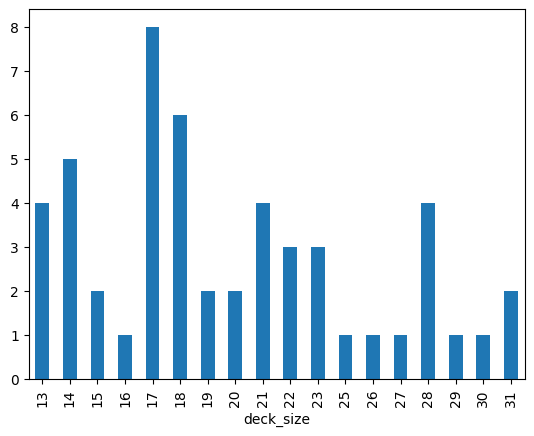

In [47]:
deck_size_by_char("WATCHER")

In [121]:
picked_df = df[['card_choices', 'floor_reached', 'character_chosen']].copy()
picked_df.head()

def get_pick_rate_dicts(df):
    picked = {}
    not_picked = {}
    for index, row in df.iterrows():
        for dict in row['card_choices']:
            for card in dict['not_picked']:
                not_picked[card] = not_picked.get(card, 0) + 1
            picked_card = dict['picked']
            picked[picked_card] = picked.get(picked_card, 0) + 1
    return picked, not_picked

def card_pick_rate_by_char(some_char):
    heart_kills = picked_df['floor_reached'] == 57
    if some_char == 'IRONCLAD': 
        char_runs = picked_df['character_chosen'] == 'IRONCLAD'
    elif some_char == 'THE_SILENT': 
        char_runs = picked_df['character_chosen'] == 'THE_SILENT'
    elif some_char == 'DEFECT': 
        char_runs = picked_df['character_chosen'] == 'DEFECT'
    else: 
        char_runs = picked_df['character_chosen'] == 'WATCHER'
    losing_runs = picked_df['floor_reached'] != 57
    heart_kills_by_char = heart_kills & char_runs
    losing_runs_by_char = losing_runs & char_runs
    losing_runs_df = picked_df[losing_runs_by_char]
    heart_kills_df = picked_df[heart_kills_by_char]
    winning_picked = {}
    winning_not_picked = {}
    losing_picked = {}
    losing_not_picked = {}
    winning_picked, winning_not_picked = get_pick_rate_dicts(heart_kills_df)
    losing_picked, losing_not_picked = get_pick_rate_dicts(losing_runs_df)
    dict_list = {"Skip_Frequency_in_Wins" : winning_not_picked, "Pick_Frequency_in_Wins" : winning_picked, 
                 "Skip_Frequency_in_Losses" : losing_not_picked, "Pick_Frequency_in_Losses" : losing_picked}
    final_picked_df = pd.DataFrame.from_dict(dict_list, orient = 'index')
    final_picked_df = final_picked_df.fillna(0)
    final_picked_df = final_picked_df.transpose()
    final_picked_df["Seen_in_Wins"] = final_picked_df["Skip_Frequency_in_Wins"] + final_picked_df["Pick_Frequency_in_Wins"]
    final_picked_df["Seen_in_loses"] = final_picked_df["Skip_Frequency_in_Losses"] + final_picked_df["Pick_Frequency_in_Losses"]
    final_picked_df["Seen"] = final_picked_df['Seen_in_loses'] + final_picked_df['Seen_in_Wins']
    final_picked_df["Pick_Rate"] = (final_picked_df['Pick_Frequency_in_Losses'] + final_picked_df['Pick_Frequency_in_Wins']) / final_picked_df['Seen']
    final_picked_df["Pick_Rate_In_Wins"] = np.where(final_picked_df["Seen_in_Wins"] == 0, 0, 
                                                    final_picked_df['Pick_Frequency_in_Wins']/final_picked_df['Seen_in_Wins'])
    final_picked_df["Pick_Rate_in_Losses"] = np.where(final_picked_df["Seen_in_loses"] == 0, 0, 
                                                      final_picked_df['Pick_Frequency_in_Losses']/final_picked_df["Seen_in_loses"])
    final_picked_df["Win_Rate_Estimate"] = final_picked_df['Pick_Frequency_in_Wins'] / final_picked_df["Seen"]
    print(final_picked_df)


In [122]:
card_pick_rate_by_char("IRONCLAD")

                    Skip_Frequency_in_Wins  Skip_Frequency_in_Losses  \
HandOfGreed                            6.0                       5.0   
Transmutation                          4.0                       8.0   
Pummel                                95.0                     207.0   
Armaments                            256.0                     550.0   
Clash                                300.0                     606.0   
...                                    ...                       ...   
Underhanded Strike                     0.0                       1.0   
Machine Learning                       0.0                       0.0   
DeusExMachina                          0.0                       0.0   
Hyperbeam                              0.0                       0.0   
Blade Dance                            0.0                       0.0   

                    Pick_Frequency_in_Losses  Pick_Frequency_in_Wins  \
HandOfGreed                              6.0                   

In [123]:
card_pick_rate_by_char("THE_SILENT")

                      Skip_Frequency_in_Wins  Pick_Frequency_in_Wins  \
Backstab                               148.0                    23.0   
Bane                                   409.0                     5.0   
PiercingWail                           211.0                   195.0   
Sucker Punch                           431.0                     4.0   
Prepared                               351.0                    30.0   
...                                      ...                     ...   
Master of Strategy+1                     0.0                     2.0   
Wraith Form v2+1                         0.0                    12.0   
Secret Technique+1                       0.0                     1.0   
Panacea+1                                0.0                     1.0   
Flash of Steel+1                         0.0                     0.0   

                      Skip_Frequency_in_Losses  Pick_Frequency_in_Losses  \
Backstab                                 271.0             

In [124]:
card_pick_rate_by_char("DEFECT")

                      Skip_Frequency_in_Wins  Pick_Frequency_in_Wins  \
Beam Cell                             1279.0                    71.0   
Redo                                  1287.0                    27.0   
Skim                                   415.0                    41.0   
White Noise                            390.0                    28.0   
Barrage                               1390.0                    23.0   
...                                      ...                     ...   
After Image                              0.0                     1.0   
Master of Strategy+1                     0.0                     1.0   
Shrug It Off                             0.0                     0.0   
Dagger Spray                             0.0                     0.0   
All Out Attack                           0.0                     0.0   

                      Skip_Frequency_in_Losses  Pick_Frequency_in_Losses  \
Beam Cell                               2168.0             

In [125]:
card_pick_rate_by_char("WATCHER")

                Skip_Frequency_in_Wins  Pick_Frequency_in_Wins  \
FlyingSleeves                    102.0                     1.0   
ThirdEye                          94.0                     6.0   
Prostrate                        111.0                     2.0   
DeceiveReality                    33.0                     3.0   
Ragnarok                          19.0                     0.0   
...                                ...                     ...   
PanicButton                        0.0                     1.0   
The Bomb                           0.0                     0.0   
Forethought+1                      0.0                     0.0   
Impatience                         0.0                     0.0   
Enlightenment                      0.0                     0.0   

                Skip_Frequency_in_Losses  Pick_Frequency_in_Losses  \
FlyingSleeves                      118.0                       0.0   
ThirdEye                           126.0                      17.0 